# Detekcija i klasifikacija prometnih znakova na fotografijama iz prometa

Autor: *Vito Sabalić*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os

## 0. Prikaz podataka

In [3]:
signnames = pd.read_csv("Dataset/signnames.csv")
meta = pd.read_csv("Dataset/Meta.csv")
meta = meta.sort_values(by=["ClassId"])

In [33]:
names = signnames["SignName"].values
images = meta["Path"].values 

for i in range(len(images)):
    image = Image.open("Dataset/" + images[i])
    image = image.resize((30, 30))
    print("{0}: {1}".format(i, names[i]))
    display(image)

0: Speed limit (20km/h)


1: Speed limit (30km/h)


2: Speed limit (50km/h)


3: Speed limit (60km/h)


4: Speed limit (70km/h)


5: Speed limit (80km/h)


6: End of speed limit (80km/h)


7: Speed limit (100km/h)


8: Speed limit (120km/h)


9: No passing


10: No passing for vehicles over 3.5 metric tons


11: Right-of-way at the next intersection


12: Priority road


13: Yield


14: Stop


15: No vehicles


16: Vehicles over 3.5 metric tons prohibited


17: No entry


18: General caution


19: Dangerous curve to the left


20: Dangerous curve to the right


21: Double curve


22: Bumpy road


23: Slippery road


24: Road narrows on the right


25: Road work


26: Traffic signals


27: Pedestrians


28: Children crossing


29: Bicycles crossing


30: Beware of ice/snow


31: Wild animals crossing


32: End of all speed and passing limits


33: Turn right ahead


34: Turn left ahead


35: Ahead only


36: Go straight or right


37: Go straight or left


38: Keep right


39: Keep left


40: Roundabout mandatory


41: End of no passing


42: End of no passing by vehicles over 3.5 metric tons


## 1. Učitavanje podataka za treniranje modela

In [3]:
cur_path = os.getcwd() + "\\Dataset" 
path = os.path.join(cur_path, 'train', str(2))
images = os.listdir(path)

image = Image.open(path + "\\" + images[17])
image = image.resize((30, 30))
image = np.array(image)

In [4]:
data = []
labels = []
classes = 43 
cur_path = os.getcwd() + "\\Dataset" 
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    labelData = []
    for a in images:
        try:
            image = Image.open(path  + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
            
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


## 2. Stvaranje i treniranje modela

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367, 43), (7842, 43))

In [29]:
eps = 15
cnn = model.fit(X_train, y_train, batch_size=32, epochs=eps, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 94s 95ms/step - loss: 1.7612 - accuracy: 0.5506 - val_loss: 0.3603 - val_accuracy: 0.9271
Epoch 2/15
981/981 [==============================] - 93s 94ms/step - loss: 0.4740 - accuracy: 0.8689 - val_loss: 0.1021 - val_accuracy: 0.9749
Epoch 3/15
981/981 [==============================] - 98s 100ms/step - loss: 0.3264 - accuracy: 0.9108 - val_loss: 0.0897 - val_accuracy: 0.9755
Epoch 4/15
981/981 [==============================] - 74s 76ms/step - loss: 0.2671 - accuracy: 0.9295 - val_loss: 0.0684 - val_accuracy: 0.9825
Epoch 5/15
981/981 [==============================] - 79s 80ms/step - loss: 0.2283 - accuracy: 0.9407 - val_loss: 0.0782 - val_accuracy: 0.9783
Epoch 6/15
981/981 [==============================] - 92s 94ms/step - loss: 0.2351 - accuracy: 0.9416 - val_loss: 0.0766 - val_accuracy: 0.9796
Epoch 7/15
981/981 [==============================] - 76s 77ms/step - loss: 0.2395 - accuracy: 0.9402 - val_loss: 0.0656 - val_accuracy

In [30]:
model.save("Projekt_model.h5")

## 3. Testiranje modela

In [4]:
dataset = pd.read_csv("Dataset/Test.csv")

In [5]:
y_true = dataset["ClassId"].values
images = dataset["Path"].values

data = []
for imPath in images:
    path = "Dataset\\" + imPath
    image = Image.open(path)
    image = image.resize((30, 30))
    data.append(np.array(image))

X_test = np.array(data)

In [6]:
X_test.shape

(12630, 30, 30, 3)

In [7]:
from keras.models import load_model

trained_model = load_model("Projekt_model.h5")
y_pred = np.argmax(trained_model.predict(X_test), axis=1)

395/395 [==============================] - 4s 9ms/step


In [8]:
from sklearn.metrics import accuracy_score

print("Accuracy score: ", accuracy_score(y_pred, y_true))

Accuracy score:  0.9555819477434679


## 4. Klasifikacija ručno izabrane slike

In [10]:
dataset = pd.read_csv("Dataset/Test.csv")
images = dataset["Path"].values
labels = dataset["ClassId"].values

Class:  30
Name: Beware of ice/snow


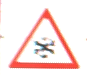

Predicted class:  29
Name:  Bicycles crossing


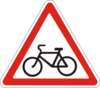

In [14]:
image_index = 443    ##izabrati bilo koji izmedu [0, 12630> za provjeru

image = Image.open("Dataset/" + images[image_index])
print("Class: ", labels[image_index])
print("Name:", signnames["SignName"].values[labels[image_index]])
display(image)

image = image.resize((30, 30))
x = np.array([np.array(image)])

y = np.argmax(trained_model.predict(x, verbose=False), axis=1)[0]
print("Predicted class: ", y)
print("Name: ", signnames["SignName"].values[y])
display(Image.open("Dataset/" + meta["Path"].values[y]))

## 5. Klasifikacija nasumično odabrane slike

In [15]:
dataset = pd.read_csv("Dataset/Test.csv")
images = dataset["Path"].values
labels = dataset["ClassId"].values

signnames = pd.read_csv("Dataset/signnames.csv")
meta = pd.read_csv("Dataset/Meta.csv").sort_values(by=["ClassId"])

Class:  3
Name: Speed limit (60km/h)


Predicted class:  5
Name:  Speed limit (80km/h)


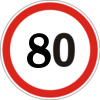

In [25]:
rng = np.random.default_rng()
image_index = rng.integers(low=0, high=12630)          ##nasumicno izmedu 12630

image = Image.open("Dataset/" + images[image_index])
print("Class: ", labels[image_index])
print("Name:", signnames["SignName"].values[labels[image_index]])
display(image)

image = image.resize((30, 30))
x = np.array([np.array(image)])

y = np.argmax(trained_model.predict(x, verbose=False), axis=1)[0]
print("Predicted class: ", y)
print("Name: ", signnames["SignName"].values[y])
display(Image.open("Dataset/" + meta["Path"].values[y]))